# Entrega #4 - Dynamic Programming

## Questão 1
Implement Policy evaluation for Example 4.1: 4x4 gridworld (page 74-76) from Sutton and Barto Book.

Print the table (matrix) with the estimated values of the states (v_pi) after convergence (when Delta <= 0.01), as in Fig. 4.1 (last plot) from the book.

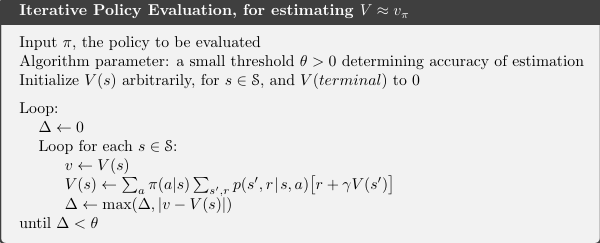

### What is Evaluation policy ?
Evaluation policy refers to a set of guidelines, principles, and procedures established by organizations, governments, or institutions to assess the effectiveness, efficiency, relevance, and impact of programs, projects, policies, or interventions. It outlines the framework within which evaluations are conducted, including the objectives of evaluation, criteria for assessment, methodologies to be employed, roles and responsibilities of stakeholders, and mechanisms for using evaluation findings.

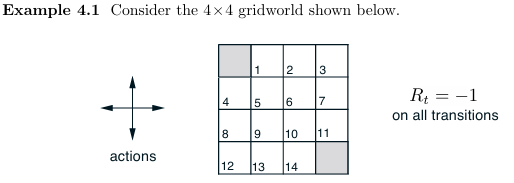

To resolve this question, I have to create the game. I shoud to define the grid and the rules o move.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(height, width):
    return np.zeros((height, width))

def evaluate_policy(grid, terminals):
    height, width = grid.shape
    new_grid = np.zeros_like(grid)
    delta = 0
    for i in range(height):
        for j in range(width):
            if (i, j) in terminals:
                continue
            old_val = grid[i, j]
            east_val = -1 + grid[min(i + 1, height - 1), j]
            west_val = -1 + grid[max(i - 1, 0), j]
            north_val = -1 + grid[i, min(j + 1, width - 1)]
            south_val = -1 + grid[i, max(j - 1, 0)]
            new_val = (east_val + west_val + north_val + south_val) / 4
            new_grid[i, j] = new_val
            delta = max(delta, abs(new_val - old_val))
    return new_grid, delta

def display_grid(grid):
    for row in grid:
        for value in row:
            print("%.3f\t" % value, end="")
        print()

height, width = 4, 4
grid = initialize_grid(height, width)

terminals = {(0, 0), (3, 3)}

delta_threshold = 0.01
delta = float('inf')
iterations = 0

while delta > delta_threshold:
    grid, delta = evaluate_policy(grid, terminals)
    iterations += 1

print(f"Converged after {iterations} iterations.")
print("Estimated values of the states (v_pi):")
display_grid(grid)


Converged after 89 iterations.
Estimated values of the states (v_pi):
0.000	-13.895	-19.845	-21.826	
-13.895	-17.863	-19.846	-19.845	
-19.845	-19.846	-17.863	-13.895	
-21.826	-19.845	-13.895	0.000	


___

## Questão 2
Solve Example 4.3: Gambler’s Problem (page 83/84) from Sutton and Barto Book using Value Iteration. After convergence, plot the Values estimates of the states as in Fig. 4.3 from the book. If you try to plot the final policy, does it look similar to the one in the book? 

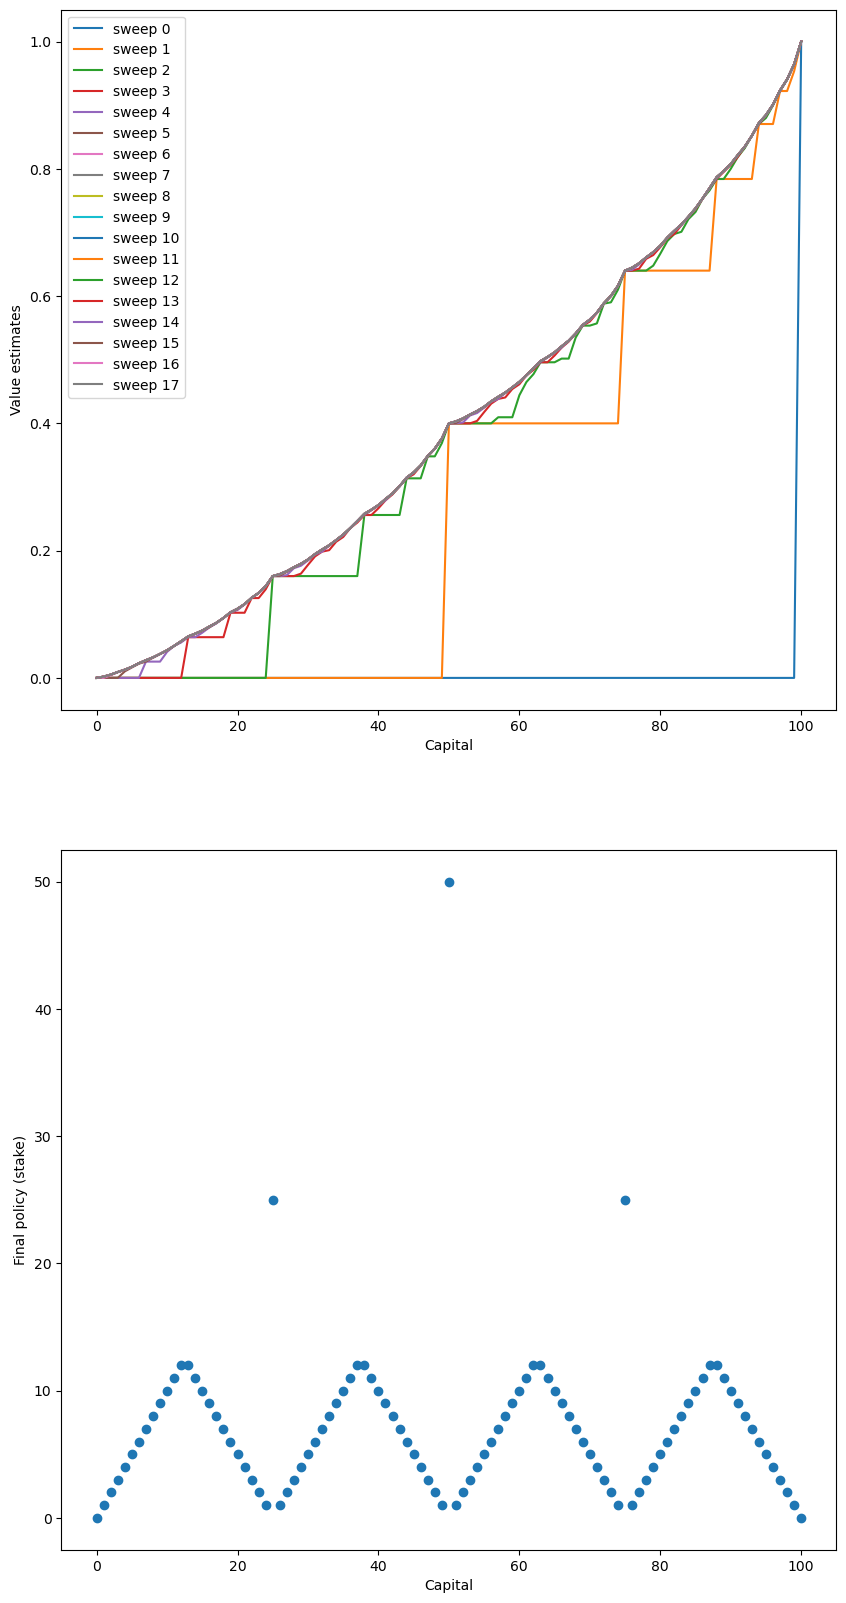

In [2]:
import matplotlib.pyplot as plt
import numpy as np

GOAL = 100
STATES = np.arange(GOAL + 1)
HEAD_PROB = 0.4

def main():
    values = np.zeros(GOAL + 1)
    values[GOAL] = 1.0

    history = []

    while True:
        old_values = values.copy()
        history.append(old_values)

        for state in STATES[1:GOAL]:
            actions = np.arange(min(state, GOAL - state) + 1)
            returns = []
            for action in actions:
                returns.append(
                    HEAD_PROB * values[state + action] + (1 - HEAD_PROB) * values[state - action])
            new_value = np.max(returns)
            values[state] = new_value
        delta = abs(values - old_values).max()
        if delta < 1e-9:
            history.append(values)
            break

    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        returns = []
        for action in actions:
            returns.append(
                HEAD_PROB * values[state + action] + (1 - HEAD_PROB) * values[state - action])

        policy[state] = actions[np.argmax(np.round(returns[1:], 5)) + 1]

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for sweep, values in enumerate(history):
        plt.plot(values, label='sweep {}'.format(sweep))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()

if __name__ == '__main__':
    main()
